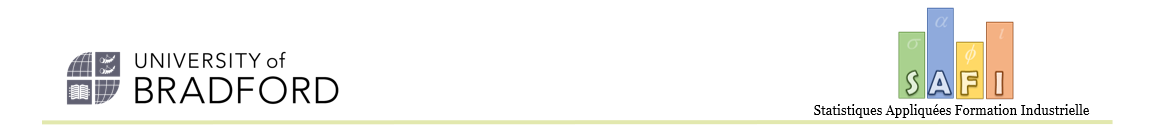

<font size=16>**Tutorial 10 - Analysing a Multi-Level Experiment**

# About this session

## Objectives

This tutorial will help you to:

* Develop Python skills to analyse a multi-level designs based on a 4 factor face-centred CC design.

## Engineering Scenario

Continuing the bumper bracket moulding story

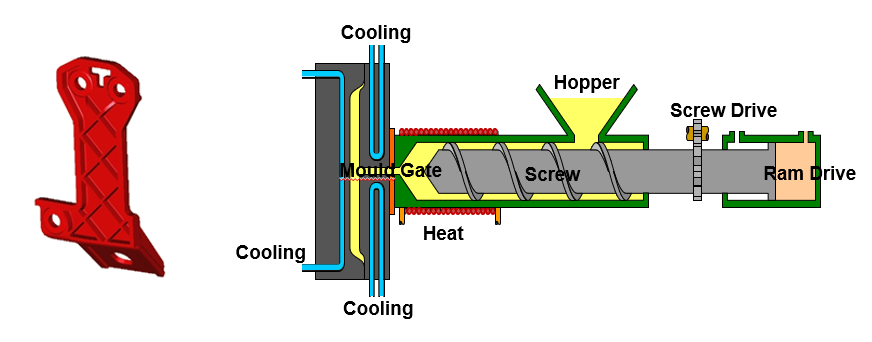

After carrying out the screening experiment for the bumper bracket study, we would now like to design a follow-up experiment. The follow-up experiment is based on the significant factors identified during the screening-experiment.

> To limit the size of the follow-up experiment, it was decided to include only 4 factors.

Based on the results of the screening experiment, factor $x_4$ $ $ was held constant; the remaining factors had the same -1/+1 levels as before, with a third level half-way between. The factors of the IM machine which are considered for this study and their settings are as follow:

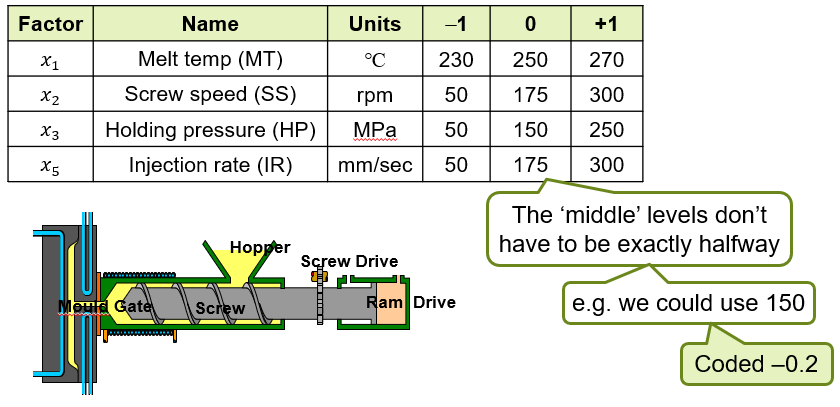

# Tutorial Tasks

## Task 1

Construct a response surface design for 4 factors.

## Task 2

Analyse the data.

## Task 3

Check the residual diagnostics.

## Task 4

Apply the t-test to the regression coefficents.

## Task 5

Plot the response surface.

---

# Packages and special code

In this section we install any packages that are not standard Colab then we import the packages that we need need into the Python namespace.



## Uploading files to Colab

1. Click on the "Files" icon on the left hand side of the Colab window (it is a folder symbol). This will take you to the "Files" panel.
2. Drag and drop the files `M05BU.py` and `M05Data.xlsx` onto the Files panel.
3. Click on the "Contents" icon (to the left of the word "Files") to go to the Table of Contents panel.
4. Use the `ls` command to get a folder listing (useful for copying and pasting file names) by running the next cell.

In [ ]:
ls

M05BU.py  M05Data.xlsx  sample_data/


## Import the courseware

Run the next cell to import the custom courseware. We have used the alias, `bu`, as shorthand for "Bradford Utilities"

In [ ]:
import M05BU as bu

## Package imports

Run the next cell to import the necessary packages into the Python namespace.

In [ ]:
import pandas as pd

# Task 1

## 1.1 Construct a response surface design for 4 factors

As explained in the lecture notes we choose 2 centre points, which is enough to give good relative PSD.

In [ ]:
doe = bu.CCD(
  4, 2,
  fact_names=['MT', 'SS', 'HP', 'IR'],
  actual_lows=[230, 50, 50, 50],
  actual_highs=[270, 300, 250, 300]
)

In [ ]:
display(doe.df.head(3))

In [ ]:
display(doe.dfr.head(3))

# Task 2

## 2.1 Read the course data

The data is in the Excel file so we load it with the following code.

In [ ]:
df = pd.read_excel(
    'M05Data.xlsx',
    sheet_name='Data for Tutorial 10'
)

In [ ]:
df.head()

## 2.2 Add response data

The strength data should now be added to the doe object as follows.

In [ ]:
doe.response = df['Strength']
doe.fit()                       # add response to the dataframes

In [ ]:
display(doe.df.head(3))

In [ ]:
display(doe.dfr.head(3))

## 2.3 Fit the model

The model can now be examined after fitting as follows:

In [ ]:
ra = bu.RegressionAnalysis(
    doe.dfr,
    ['MT', 'SS', 'HP', 'IR'],
    'Y',
    code=True
)
ra.results()

# Task 3

## 3.1 Check the residual diagnostics

The resisual diagnostics are below:

In [ ]:
ra.res4pack()

### Interpretation of the results



- In the figure above, the Normal plot has a good linear pattern, indicating the residuals follows the normal distribution.

- The second plot, `Deleted Residuals vs Fitted Values`, is "healthy" (no trends are visible). Deleted residuals outside the range -3 to +3, indicating there is no evidence of outliers, and the **constant $\sigma$** assumption appears to be reasonable because the amplitude is roughly constant across the plot.

> The **constant $\sigma$** assumption is important in regression analysis. If the random variation in $y$ is very different at different levels of the predictors ($x$'s) we should not use the ordinary least squares method to fit the regression equation.

- The bottom right plot, `Deleted Residuals vs Order`, will sometimes show a pattern that we can interpret, e.g. the amplitude of the residuals may increase over time, showing that variability increased over the course of the data collection.

# Task 4

## 4.1 Apply the t-test to the regression coefficents



Now that we have fitted the model, the next step is to simplify it by eliminating the terms which are not significant. This is done by examining the p-values against a threshold criteria.

For this case, we will use a relaxed threshold value of 0.15 or 15%. This means we will remove the terms which have p-values higher than 0.15.

> **NB**
> 
> We should remove one term at a time, starting with the term with largest p-value. Therefater, we fit the model again and repeat the process until all of the insignificant terms have been removed.

The output of the formal statistical analysis, shows that the largest p-value is `0.772`, for the $2fi: (SS*IR)$. This is highlighted in the figure below:

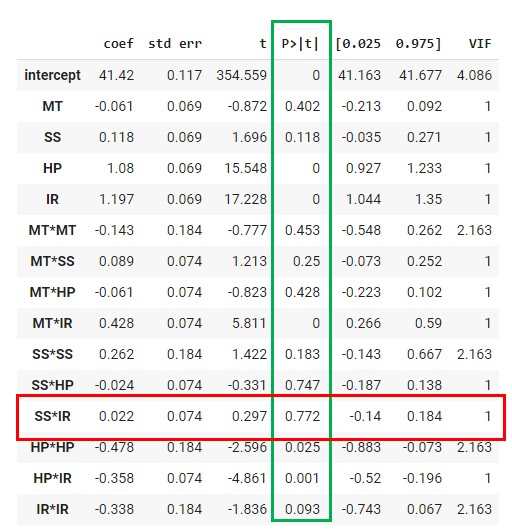

To-refit without this term, we create an exclude list and reference it in the fitting command.

This has been implemented in the following cell as an example. Run the cell to re-fit the model without this term.

In [ ]:
exc = ['SS*IR']
ra = bu.RegressionAnalysis(
    doe.dfr,
    ['MT', 'SS', 'HP', 'IR'],
    'Y',
    exclude=exc,
    code=True
)
ra.results()

You can now eliminate terms one by one until you reach the final model.

### Solution for the final model

```python
exc = ['SS*IR', 'SS*HP', 'MT*MT', 'MT*HP', 'MT*SS', 'SS*SS']
```

# Task 5

## 5.1 Plot the response surface



In [ ]:
df = doe.dfr
fig, ax = bu.surf_plot(
    [df['MT'], df['SS'], df['HP'], df['IR']],
    df['Y']
)